In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Kara = pd.read_excel(filepath, sheet_name='Kara-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Kara)
fp.date_time(Kara)

,Extent,Date
0,917992.880,1979-01-01
1,917992.880,1979-02-01
2,917992.880,1979-03-01
3,917992.880,1979-04-01
4,917992.880,1979-05-01
...,...,...
533,728642.743,2023-06-01
534,437024.646,2023-07-01
535,202260.789,2023-08-01
536,98103.856,2023-09-01


In [5]:
scaler = MinMaxScaler()
Kara['Extent'] = scaler.fit_transform(Kara['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 12
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Kara['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((515, 12, 1), (515,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Kara_model_LT12/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.6529 - root_mean_squared_error: 0.8080

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 8s 103ms/step - loss: 0.6529 - root_mean_squared_error: 0.8080 - val_loss: 0.5233 - val_root_mean_squared_error: 0.7234
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.5351 - root_mean_squared_error: 0.7315

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.5351 - root_mean_squared_error: 0.7315 - val_loss: 0.4701 - val_root_mean_squared_error: 0.6857
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.4643 - root_mean_squared_error: 0.6814

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.4666 - root_mean_squared_error: 0.6831 - val_loss: 0.4135 - val_root_mean_squared_error: 0.6431
Epoch 4/50
52/53 [============================>.] - ETA: 0s - loss: 0.4056 - root_mean_squared_error: 0.6369

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.4053 - root_mean_squared_error: 0.6366 - val_loss: 0.3669 - val_root_mean_squared_error: 0.6057
Epoch 5/50
48/53 [==========================>...] - ETA: 0s - loss: 0.3461 - root_mean_squared_error: 0.5883

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.3451 - root_mean_squared_error: 0.5874 - val_loss: 0.3151 - val_root_mean_squared_error: 0.5613
Epoch 6/50
49/53 [==========================>...] - ETA: 0s - loss: 0.2961 - root_mean_squared_error: 0.5441

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.2916 - root_mean_squared_error: 0.5400 - val_loss: 0.2682 - val_root_mean_squared_error: 0.5179
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2438 - root_mean_squared_error: 0.4938

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.2465 - root_mean_squared_error: 0.4965 - val_loss: 0.2174 - val_root_mean_squared_error: 0.4662
Epoch 8/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2022 - root_mean_squared_error: 0.4497

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.2005 - root_mean_squared_error: 0.4478 - val_loss: 0.1884 - val_root_mean_squared_error: 0.4341
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1581 - root_mean_squared_error: 0.3977

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.1596 - root_mean_squared_error: 0.3995 - val_loss: 0.1602 - val_root_mean_squared_error: 0.4003
Epoch 10/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1365 - root_mean_squared_error: 0.3695

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.1327 - root_mean_squared_error: 0.3642 - val_loss: 0.1022 - val_root_mean_squared_error: 0.3196
Epoch 11/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1055 - root_mean_squared_error: 0.3248

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.1055 - root_mean_squared_error: 0.3249 - val_loss: 0.0843 - val_root_mean_squared_error: 0.2904
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0924 - root_mean_squared_error: 0.3040

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0893 - root_mean_squared_error: 0.2988 - val_loss: 0.0680 - val_root_mean_squared_error: 0.2607
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0684 - root_mean_squared_error: 0.2615

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0682 - root_mean_squared_error: 0.2612 - val_loss: 0.0580 - val_root_mean_squared_error: 0.2408
Epoch 14/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0532 - root_mean_squared_error: 0.2306

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0530 - root_mean_squared_error: 0.2302 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 15/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0482 - root_mean_squared_error: 0.2195

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0480 - root_mean_squared_error: 0.2191 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1810
Epoch 16/50
53/53 [==============================] - ETA: 0s - loss: 0.0334 - root_mean_squared_error: 0.1827

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0334 - root_mean_squared_error: 0.1827 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1495
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0324 - root_mean_squared_error: 0.1801 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1551
Epoch 18/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0328 - root_mean_squared_error: 0.1812

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0316 - root_mean_squared_error: 0.1779 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0247 - root_mean_squared_error: 0.1572 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1259
Epoch 20/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0279 - root_mean_squared_error: 0.1672

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0272 - root_mean_squared_error: 0.1648 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1111
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0289 - root_mean_squared_error: 0.1701 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1311
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0215 - root_mean_squared_error: 0.1466 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1643
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0208 - root_mean_squared_error: 0.1443 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1125
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0248 - root_mean_squared_error: 0.1573 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0221 - root_mean_squared_error: 0.1485 - val_loss: 0.0182 - val_root_mean_square

INFO:tensorflow:Assets written to: Kara_model_LT12\assets


INFO:tensorflow:Assets written to: Kara_model_LT12\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0212 - root_mean_squared_error: 0.1456 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0227 - root_mean_squared_error: 0.1506 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1666
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0201 - root_mean_squared_error: 0.1416 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1396
Epoch 37/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0234 - root_mean_squared_error: 0.1530 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1154
Epoch 38/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0204 - root_mean_squared_error: 0.1429 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1581
Epoch 39/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0130 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.7677718599637349 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

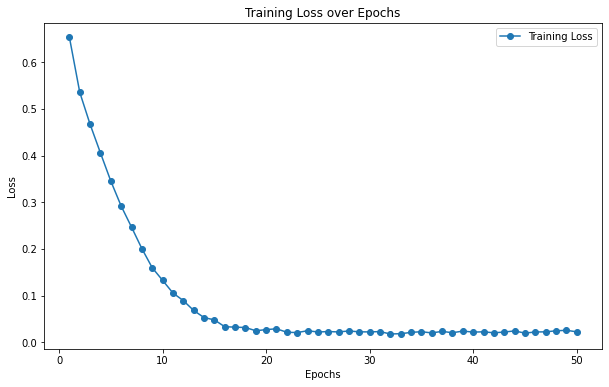

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

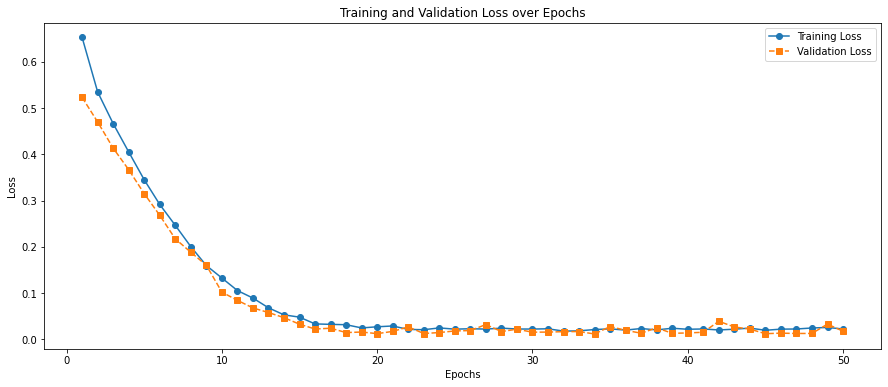

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Kara_model_LT12/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.1255330554271838
MAE : 0.09117687744184091


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,891348.250000,910653.838
1,886888.937500,822319.125
2,743439.750000,557314.102
3,372542.937500,197129.525
4,145947.828125,75730.217
5,162418.609375,59608.479
6,309836.375000,88785.283
7,719602.625000,396883.400
8,855870.375000,662542.207
9,939884.250000,871431.414


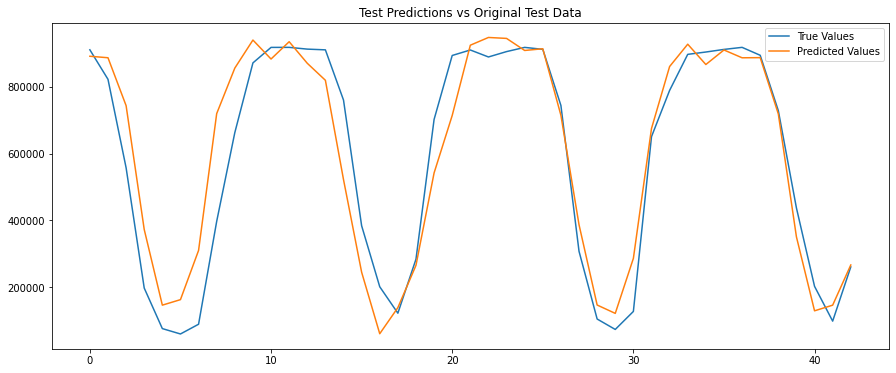

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

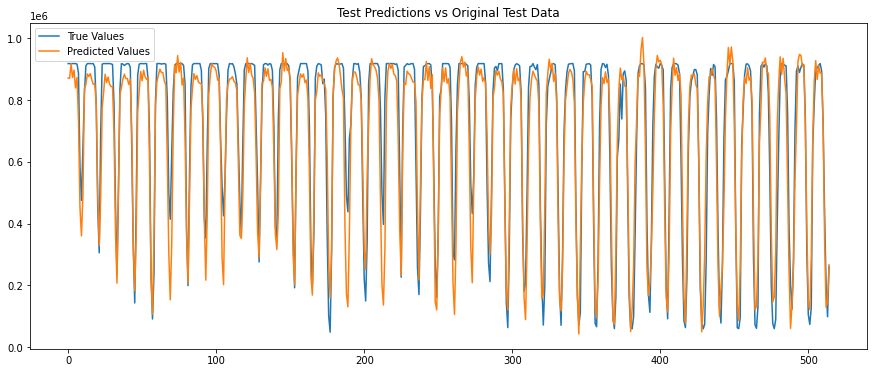

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()